<a href="https://colab.research.google.com/github/TristanDelgado/Intro-To-Machine-Learning/blob/main/Homework%20Solutions/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning CS-4410-XTIA Homework 6

## Instructions

Create a top-20 word frequency bar chart and a word cloud, based on Shakespeare’s Hamlet. Use the mask_oval.png file provided in the ch12 examples folder as the mask.

### Initial Setup

In [1]:
from nltk import downloader

downloader.download("stopwords")
downloader.download("wordnet")
downloader.download("punkt")
downloader.download("punkt_tab")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
!pip install requests

In [3]:
import requests

target_url ='http://www.gutenberg.org/files/2265/2265.txt'

response = requests.get(target_url)

data = response.text

In [4]:
from textblob import TextBlob
blob = TextBlob(data)

In [5]:
import imageio

image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"

mask_image =imageio.v3.imread(image_file)

### Solution

In [6]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
items = blob.word_counts.items()
items = [item for item in items if item[0] not in stop_words]

In [11]:
from operator import itemgetter

sorted_items = sorted(items, key=itemgetter(1), reverse=True)
top20 = sorted_items[0:20]

<Figure size 640x480 with 0 Axes>

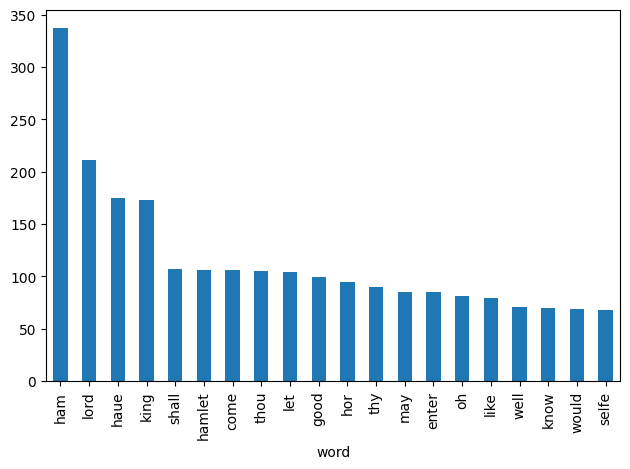

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

plt.clf()

df = pd.DataFrame(top20, columns=["word", "count"])
axes = df.plot.bar(x='word', y='count', legend=False)
plt.gcf().tight_layout()

In [9]:
!pip install wordcloud

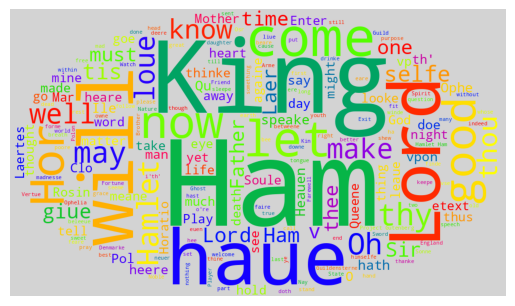

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.clf()
wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='lightgray')
wordcloud = wordcloud.generate(data)

plt.axis("off")
plt.imshow(wordcloud)